<a href="https://colab.research.google.com/github/ajr288/ORIE-4580-HW/blob/main/ORIE_4580_HW_4_Blake_and_Andrea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 4

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

https://github.com/bkgreen1234-ctrl/ORIE-4580.git


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

In [8]:
import numpy as np
import pandas as pd


rng = np.random.default_rng(42)


n_passengers = 10000


arrival_times = rng.uniform(0, 1000, size=n_passengers)


sorted_idx = np.argsort(arrival_times)
arrival_times_sorted = arrival_times[sorted_idx]
df = pd.DataFrame({
    "passenger_id": np.arange(1, n_passengers + 1, dtype=int),
    "arrival_time_minutes": arrival_times_sorted
})
print(df.head(10))



   passenger_id  arrival_time_minutes
0             1              0.314420
1             2              0.416917
2             3              0.518744
3             4              0.568129
4             5              0.571056
5             6              0.642304
6             7              0.824617
7             8              0.926107
8             9              0.955333
9            10              0.989994


<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

In [9]:

train_headway = 10.0


wait_times = (train_headway - (arrival_times_sorted % train_headway))


sample_mean = wait_times.mean()
sample_std = wait_times.std(ddof=1)
se = sample_std / np.sqrt(n_passengers)
z = 1.96  # 95% CI
ci_normal = (sample_mean - z * se, sample_mean + z * se)



print(f"Estimated mean wait: {sample_mean:.4f} minutes")
print(f"95% CI (Normal approx): [{ci_normal[0]:.4f}, {ci_normal[1]:.4f}] minutes")



Estimated mean wait: 4.9764 minutes
95% CI (Normal approx): [4.9200, 5.0329] minutes


## Ans.
Our simulation estimates the mean wait time as 4.9764 minutes

<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

In [10]:


mean_interarrival = 10.0
rng = np.random.default_rng(12345)

T_max = arrival_times_sorted[-1]
buffer = 10 * mean_interarrival
T_end = T_max + buffer

train_times = []
t = 0.0
while t < T_end:
    t += rng.exponential(mean_interarrival)
    train_times.append(t)
train_times = np.array(train_times)

idx_next = np.searchsorted(train_times, arrival_times_sorted, side='left')
wait_times_exp = train_times[idx_next] - arrival_times_sorted

assert np.all(wait_times_exp >= 0)


sample_mean = wait_times_exp.mean()
sample_std = wait_times_exp.std(ddof=1)
se = sample_std / np.sqrt(n_passengers)
z = 1.96
ci_normal = (sample_mean - z * se, sample_mean + z * se)




print(f"Estimated mean wait: {sample_mean:.4f} minutes")
print(f"95% CI (Normal approx): [{ci_normal[0]:.4f}, {ci_normal[1]:.4f}] minutes")


Estimated mean wait: 9.7532 minutes
95% CI (Normal approx): [9.5692, 9.9372] minutes


## Ans.
Our esitmated expected wait time is 9.7532 minutes

<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [12]:

inter_arrivals = np.diff(train_times)
n_inter = inter_arrivals.size
sample_mean = inter_arrivals.mean()
sample_std = inter_arrivals.std(ddof=1)
se = sample_std / np.sqrt(n_inter)
z = 1.96
ci_normal = (sample_mean - z * se, sample_mean + z * se)

print(f"Number of observed intervals: {n_inter}")
print(f"Estimated mean inter-arrival: {sample_mean:.4f} minutes")
print(f"95% CI (Normal approx):      [{ci_normal[0]:.4f}, {ci_normal[1]:.4f}] minutes")



Number of observed intervals: 117
Estimated mean inter-arrival: 9.4742 minutes
95% CI (Normal approx):      [7.7324, 11.2159] minutes


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.



- In the deterministic case, every gap between trains is exactly 10 minutes.  
  Therefore, all passengers experience the same inter-arrival time $I_i = 10$, and since arrivals are uniform, the expected wait is half of that:

  $$E[W_i] = \frac{1}{2}E[I_i] = 5\ \text{minutes.}$$

- In the exponential case, even though the *average* train spacing is still 10 minutes, the experienced interval $I_i$ is much larger ($\approx 19.45$ min).  
  This happens because passengers are more likely to arrive during long gaps — longer intervals occupy more of the time axis, so random arrivals have a higher chance of landing in them.  
  Consequently, the mean waiting time rises to roughly half of that value:

  $$E[W_i] \approx \frac{1}{2}E[I_i] \approx 9.7\text{–}10\ \text{minutes.}$$



- Deterministic schedule
  $$E[I_i] = 10,\quad E[W_i] = 5$$  

- Exponential schedule
  $$E[I_i] \approx 20,\quad E[W_i] \approx 10$$  



In [13]:
import numpy as np


def mean_ci(x, alpha=0.05):
    """Return (mean, sd, se, ci_low, ci_high) using normal approximation."""
    x = np.asarray(x, dtype=float)
    n = x.size
    m = x.mean()
    sd = x.std(ddof=1)
    se = sd / np.sqrt(n)
    z = 1.96
    return m, sd, se, m - z * se, m + z * se



rng_pass = np.random.default_rng(22)
n_passengers = 10_000
arrivals = rng_pass.uniform(0, 1000, size=n_passengers)
arrivals.sort()


period = 10.0

train_times_det = np.arange(0.0, 1000 + 3*period, period)


board_idx_det = np.searchsorted(train_times_det, arrivals, side='left')


valid_det = board_idx_det > 0
I_det = train_times_det[board_idx_det[valid_det]] - train_times_det[board_idx_det[valid_det] - 1]


waits_det = (period - (arrivals % period)) % period

m_I_det, sd_I_det, se_I_det, lo_I_det, hi_I_det = mean_ci(I_det)
m_W_det, sd_W_det, se_W_det, lo_W_det, hi_W_det = mean_ci(waits_det)

print("=== Deterministic (every 10 minutes) ===")
print(f"Passengers used for I_i: {valid_det.sum()} of {n_passengers}")
print(f"Mean passenger-experienced inter-arrival  I_i: {m_I_det:.3f}  "
      f"(95% CI: [{lo_I_det:.3f}, {hi_I_det:.3f}])")
print(f"Mean wait time (for reference):            {m_W_det:.3f}  "
      f"(95% CI: [{lo_W_det:.3f}, {hi_W_det:.3f}])")
print()

rng_trains = np.random.default_rng(7)
mean_interval = 10.0

train_times_exp = [0.0]
while train_times_exp[-1] < 1000 + 3*mean_interval:
    train_times_exp.append(train_times_exp[-1] + rng_trains.exponential(mean_interval))
train_times_exp = np.array(train_times_exp)

board_idx_exp = np.searchsorted(train_times_exp, arrivals, side='left')


valid_exp = board_idx_exp > 0
I_exp = train_times_exp[board_idx_exp[valid_exp]] - train_times_exp[board_idx_exp[valid_exp] - 1]

waits_exp = train_times_exp[board_idx_exp] - arrivals

m_I_exp, sd_I_exp, se_I_exp, lo_I_exp, hi_I_exp = mean_ci(I_exp)
m_W_exp, sd_W_exp, se_W_exp, lo_W_exp, hi_W_exp = mean_ci(waits_exp)

print("=== Exponential inter-arrivals (mean 10 minutes) ===")
print(f"Trains simulated: {len(train_times_exp)-1}")
print(f"Passengers used for I_i: {valid_exp.sum()} of {n_passengers}")
print(f"Mean passenger-experienced inter-arrival  I_i: {m_I_exp:.3f}  "
      f"(95% CI: [{lo_I_exp:.3f}, {hi_I_exp:.3f}])")
print(f"Mean wait time (for reference):            {m_W_exp:.3f}  "
      f"(95% CI: [{lo_W_exp:.3f}, {hi_W_exp:.3f}])")




=== Deterministic (every 10 minutes) ===
Passengers used for I_i: 10000 of 10000
Mean passenger-experienced inter-arrival  I_i: 10.000  (95% CI: [10.000, 10.000])
Mean wait time (for reference):            4.991  (95% CI: [4.935, 5.048])

=== Exponential inter-arrivals (mean 10 minutes) ===
Trains simulated: 102
Passengers used for I_i: 10000 of 10000
Mean passenger-experienced inter-arrival  I_i: 19.455  (95% CI: [19.207, 19.702])
Mean wait time (for reference):            9.867  (95% CI: [9.686, 10.049])


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

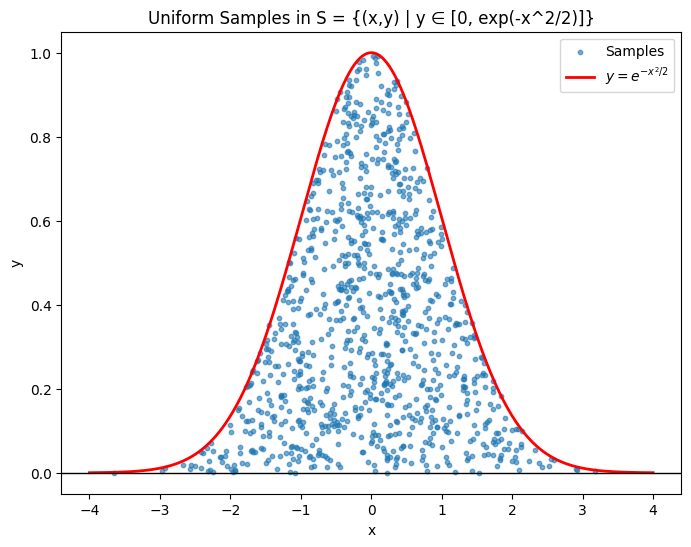

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


n_samples = 1000


rng = np.random.default_rng(42)


X = rng.normal(0, 1, size=n_samples)


Y_max = np.exp(-X**2 / 2)
Y = rng.uniform(0, 1, size=n_samples) * Y_max


plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=10, alpha=0.6, label="Samples")

x_grid = np.linspace(-4, 4, 400)
plt.plot(x_grid, np.exp(-x_grid**2 / 2), color='red', lw=2, label=r"$y=e^{-x^2/2}$")
plt.axhline(0, color='black', lw=1)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform Samples in S = {(x,y) | y ∈ [0, exp(-x^2/2)]}")
plt.legend()
plt.show()


<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

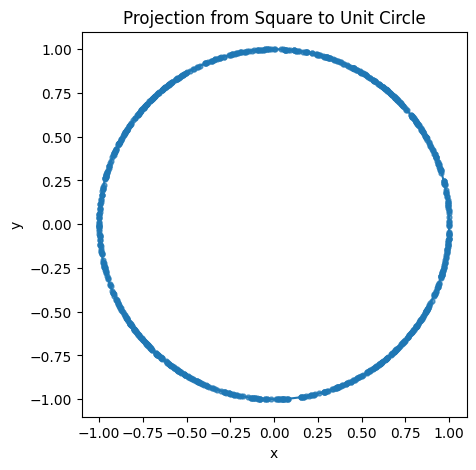

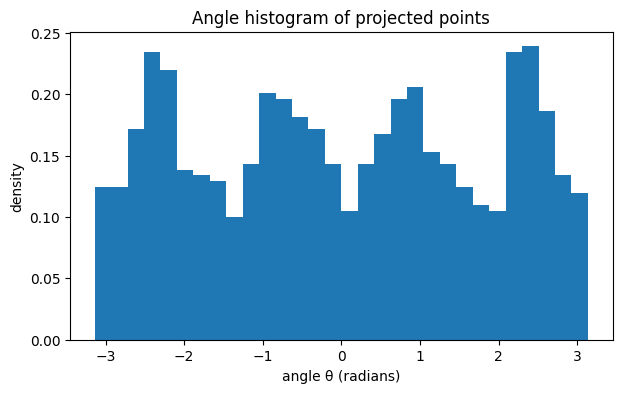

Mean of angles (radians): 0.004414923466141781


In [ ]:

import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n = 1000


U = rng.uniform(-1, 1, size=n)
V = rng.uniform(-1, 1, size=n)


r = np.sqrt(U**2 + V**2)
mask = r > 0
U, V, r = U[mask], V[mask], r[mask]


X = U / r
Y = V / r


plt.figure(figsize=(5,5))
plt.scatter(X, Y, s=12, alpha=0.7)
t = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(t), np.sin(t))
plt.gca().set_aspect('equal', 'box')
plt.title("Projection from Square to Unit Circle")
plt.xlabel("x"); plt.ylabel("y")
plt.show()


theta = np.arctan2(Y, X)
plt.figure(figsize=(7,4))
plt.hist(theta, bins=30, density=True)
plt.xlabel("angle θ (radians)")
plt.ylabel("density")
plt.title("Angle histogram of projected points")
plt.show()

print("Mean of angles (radians):", theta.mean())


<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

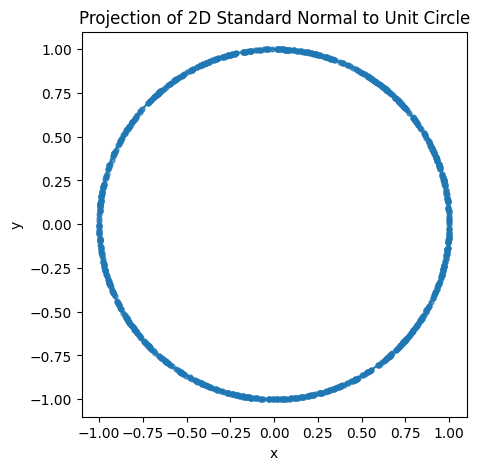

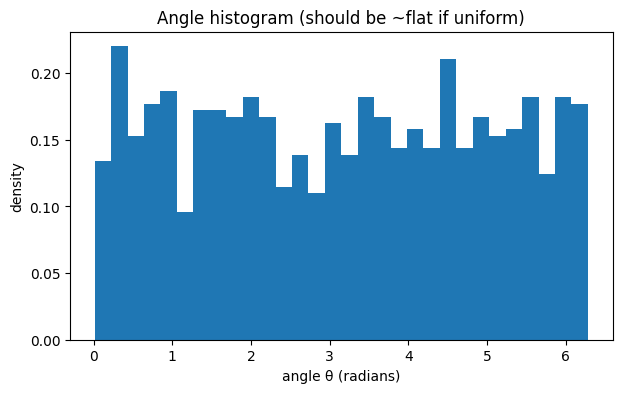

Mean angle (radians): 3.1503409063727723


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)
n = 1000


Z = rng.normal(0, 1, size=n)
W = rng.normal(0, 1, size=n)


r = np.sqrt(Z**2 + W**2)

mask = r > 0
X = Z[mask] / r[mask]
Y = W[mask] / r[mask]


plt.figure(figsize=(5,5))
plt.scatter(X, Y, s=12, alpha=0.7)
t = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(t), np.sin(t))
plt.gca().set_aspect('equal', 'box')
plt.title("Projection of 2D Standard Normal to Unit Circle")
plt.xlabel("x"); plt.ylabel("y")
plt.show()


theta = np.arctan2(Y, X)
theta = (theta + 2*np.pi) % (2*np.pi)
plt.figure(figsize=(7,4))
plt.hist(theta, bins=30, density=True)
plt.xlabel("angle θ (radians)")
plt.ylabel("density")
plt.title("Angle histogram (should be ~flat if uniform)")
plt.show()

print("Mean angle (radians):", theta.mean())


<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.
Given independent annual real returns
$$
R_{\text{US stocks}}\sim \mathcal N(\mu_1,\sigma_1^2),\quad
R_{\text{US bonds}}\sim \mathcal N(\mu_2,\sigma_2^2),\quad
R_{\text{EM bonds}}\sim \mathcal N(\mu_3,\sigma_3^2),
$$
with
$$
\mu=\begin{bmatrix}0.14\\0.07\\0.16\end{bmatrix},\quad
\sigma=\begin{bmatrix}\sqrt{0.0625}\\ \sqrt{0.01}\\ \sqrt{0.09}\end{bmatrix}
=\begin{bmatrix}0.25\\0.10\\0.30\end{bmatrix}.
$$

By independence,
$$
\mathbb{P}(R_1>0,\ R_2>0,\ R_3>0)
=\prod_{i=1}^3 \mathbb{P}(R_i>0)
=\prod_{i=1}^3 \Phi\!\left(\frac{\mu_i}{\sigma_i}\right),
$$
where $\Phi$ is the standard normal CDF.

Compute the $z$-scores:
$$
z_1=\frac{0.14}{0.25}=0.56,\qquad
z_2=\frac{0.07}{0.10}=0.70,\qquad
z_3=\frac{0.16}{0.30}=\frac{8}{15}\approx 0.5333.
$$

Therefore,
$$
\begin{aligned}
\mathbb{P}(R_1>0) &= \Phi(0.56) \approx 0.712260,\\
\mathbb{P}(R_2>0) &= \Phi(0.70) \approx 0.758036,\\
\mathbb{P}(R_3>0) &= \Phi(0.5333) \approx 0.703099.
\end{aligned}
$$

Multiply:
$$
\mathbb{P}(\text{all three} > 0)
\approx 0.712260 \times 0.758036 \times 0.703099
\approx \boxed{0.3796}\ (\text{about }37.96\%).
$$



<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [14]:

from scipy.linalg import cholesky
from scipy.stats import beta


mu = np.array([0.14, 0.07, 0.16])

Sigma = np.array([
    [0.0625, -0.01,   0.0375],
    [-0.01,   0.01,  -0.015 ],
    [0.0375, -0.015,  0.09  ]
], dtype=float)

N = 200_000
rng = np.random.default_rng(42)


L = cholesky(Sigma, lower=True)


Z = rng.normal(size=(N, 3))


X = mu + Z @ L.T


success = np.all(X > 0, axis=1)
k = success.sum()
p_hat = k / N


se = np.sqrt(p_hat * (1 - p_hat) / N)
z = 1.96
ci_norm = (p_hat - z * se, p_hat + z * se)


alpha = 0.05

lo = beta.ppf(alpha/2, k, N - k + 1) if k > 0 else 0.0
hi = beta.ppf(1 - alpha/2, k + 1, N - k) if k < N else 1.0
ci_cp = (lo, hi)

print("=== Monte Carlo estimate with Cholesky (no multivariate_normal) ===")
print(f"Samples: N = {N}")
print(f"Estimated P(all three > 0): {p_hat:.6f}")
print(f"95% CI (Normal approx):     [{ci_norm[0]:.6f}, {ci_norm[1]:.6f}]")
print(f"95% CI (Clopper-Pearson):   [{ci_cp[0]:.6f}, {ci_cp[1]:.6f}]")


=== Monte Carlo estimate with Cholesky (no multivariate_normal) ===
Samples: N = 200000
Estimated P(all three > 0): 0.369595
95% CI (Normal approx):     [0.367479, 0.371711]
95% CI (Clopper-Pearson):   [0.367479, 0.371715]


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.


For $U \sim \text{Uniform}[\alpha, \beta]$:

- Mean:
$$
E[U] = \frac{\alpha + \beta}{2} = 0
\Rightarrow \beta = -\alpha
$$

- Variance:
$$
Var(U) = \frac{(\beta - \alpha)^2}{12} = 1
$$

Substitute $\beta = -\alpha$:

$$
\frac{(-2\alpha)^2}{12} = 1
\Rightarrow \frac{4\alpha^2}{12} = 1
\Rightarrow \alpha^2 = 3
$$

Thus:

$$
\boxed{\alpha = -\sqrt{3}, \; \beta = \sqrt{3}}
$$









<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.


Since $E[X_1]=E[X_2]=0$ and $\mathrm{Var}(X_1)=\mathrm{Var}(X_2)=1$:

1. **Expected value:**
$$
E[V_2] = (1-p)E[X_1] + pE[X_2] = 0
$$

2. **Variance:**
Using total variance:
$$
Var(V_2) = E[Var(V_2|B)] + Var(E[V_2|B])
$$
$$
Var(V_2|B=0)=Var(X_1)=1, \quad Var(V_2|B=1)=Var(X_2)=1
$$
Hence:
$$
E[Var(V_2|B)] = (1-p)\cdot1 + p\cdot1 = 1, \quad Var(E[V_2|B])=0
$$
Therefore:

$$
E[V_2] = 0, \quad Var(V_2) = 1
$$



<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.




$$
\mathrm{Cov}(V_1,V_2)=E[V_1V_2]-E[V_1]E[V_2].
$$

Since $E[X_1]=E[X_2]=0$,
$$
E[V_1V_2]=E\big[X_1\big((1-B)X_1 + B X_2\big)\big]
= (1-p)E[X_1^2] + p\,E[X_1X_2]
= (1-p)\cdot 1 + p\cdot 0
= 1-p.
$$

Thus
$$
\mathrm{Cov}(V_1,V_2)=1-p.
$$

Setting $\mathrm{Cov}(V_1,V_2)=\sigma_{12}\ (\ge 0)$ gives
$$
1 - p = \sigma_{12}\ \;\Rightarrow\;\ \boxed{p = 1 - \sigma_{12}}.
$$



<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

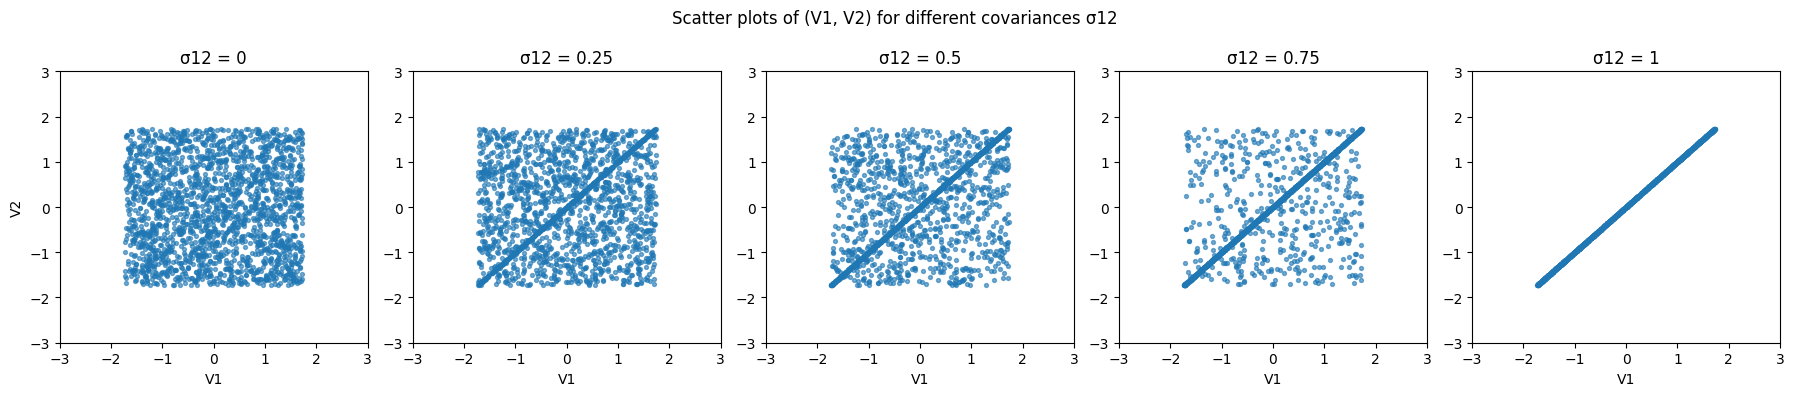

In [20]:

import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

def generate_correlated_uniforms(n, sigma12):

    X1 = rng.uniform(-np.sqrt(3), np.sqrt(3), size=n)
    X2 = rng.uniform(-np.sqrt(3), np.sqrt(3), size=n)

    p = 1 - sigma12
    B = rng.binomial(1, p, size=n)
    V1 = X1
    V2 = (1 - B) * X1 + B * X2
    return V1, V2


sigma_vals = [0, 0.25, 0.5, 0.75, 1]
n_samples = 2000

fig, axes = plt.subplots(1, len(sigma_vals), figsize=(18, 4))

for i, sigma in enumerate(sigma_vals):
    V1, V2 = generate_correlated_uniforms(n_samples, sigma)
    axes[i].scatter(V1, V2, s=8, alpha=0.6)
    axes[i].set_title(f"σ12 = {sigma}")
    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(-3, 3)
    axes[i].set_xlabel("V1")
    if i == 0:
        axes[i].set_ylabel("V2")

plt.suptitle("Scatter plots of (V1, V2) for different covariances σ12")
plt.tight_layout()
plt.show()


<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [19]:


rng = np.random.default_rng(123)

def generate_correlated_uniforms(n, sigma12):
    X1 = rng.uniform(-np.sqrt(3), np.sqrt(3), size=n)
    X2 = rng.uniform(-np.sqrt(3), np.sqrt(3), size=n)
    p = 1 - sigma12
    B = rng.binomial(1, p, size=n)
    V1 = X1
    V2 = (1 - B) * X1 + B * X2
    return V1, V2


n_samples = 1_000_000
sigma12 = 0.5

V1, V2 = generate_correlated_uniforms(n_samples, sigma12)


prob = np.mean((V1 <= 0) & (V2 <= 0))

print(f"Estimated P[V1 ≤ 0, V2 ≤ 0] for σ12={sigma12}: {prob:.4f}")


Estimated P[V1 ≤ 0, V2 ≤ 0] for σ12=0.5: 0.3748


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.
Let $(Z_1,Z_2)$ be bivariate normal with mean $0$, unit variances, and correlation $\rho$.  
Each marginal $Z_i \sim \mathcal N(0,1)$.

**Step 1 (Probability integral transform):**  
Define $U_i = \Phi(Z_i)$, where $\Phi$ is the standard normal CDF.  
Then
$$
\Pr(U_i \le u) = \Pr(Z_i \le \Phi^{-1}(u)) = \Phi(\Phi^{-1}(u)) = u,
$$
so $U_i \sim \text{Uniform}(0,1)$.

**Step 2 (Affine rescaling):**  
Set
$$
W_i = \alpha + (\beta - \alpha) U_i.
$$
For $\alpha \le w \le \beta$,
$$
\Pr(W_i \le w) = \Pr\!\left(U_i \le \frac{w-\alpha}{\beta-\alpha}\right) = \frac{w-\alpha}{\beta-\alpha},
$$
which is the CDF of $\text{Uniform}(\alpha,\beta)$.

Thus, each $W_i$ is uniform on $[\alpha,\beta]$.  
With $\alpha = -\sqrt{3}, \ \beta = \sqrt{3}$, we obtain
$$
\mathbb E[W_i] = 0,
\qquad
\mathrm{Var}(W_i) = 1.
$$



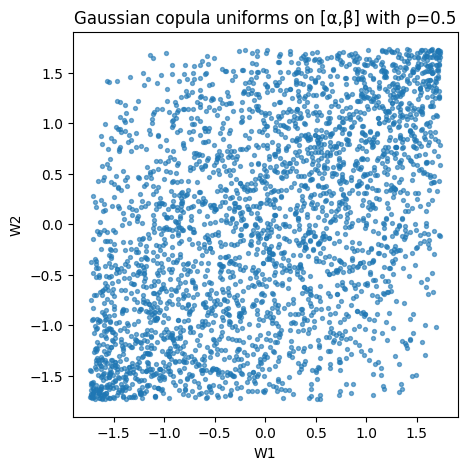

Estimated P[W1 ≥ 0, W2 ≥ 0] (ρ=0.5): 0.33270
95% CI (normal approx): [0.33063, 0.33476]
Analytical value (should match): 0.33333


In [18]:



alpha = -np.sqrt(3)
beta  =  np.sqrt(3)
rho   = 0.5
N     = 200_000
n_plot = 3000

rng = np.random.default_rng(42)

def gaussian_copula_uniforms(n, rho, alpha, beta, rng=None):
    """
    Generate n pairs (W1, W2) using a Gaussian copula with correlation rho.
    Steps:
      1) Sample Z ~ N(0, Sigma) with Sigma=[[1,rho],[rho,1]] via Cholesky.
      2) U = (Phi(Z1), Phi(Z2)) -> Uniform(0,1) marginals.
      3) W = alpha + (beta-alpha)*U -> Uniform[alpha, beta] marginals.
    """
    if rng is None:
        rng = np.random.default_rng()

    Sigma = np.array([[1.0, rho],
                      [rho, 1.0]])
    L = np.linalg.cholesky(Sigma)

    Z_std = rng.normal(size=(n, 2))

    Z = Z_std @ L.T


    from math import erf, sqrt
    Phi = lambda z: 0.5 * (1.0 + erf(z / sqrt(2.0)))
    U = np.empty_like(Z)
    U[:,0] = [Phi(z) for z in Z[:,0]]
    U[:,1] = [Phi(z) for z in Z[:,1]]


    W = alpha + (beta - alpha) * U
    W1, W2 = W[:,0], W[:,1]
    return W1, W2


W1_plot, W2_plot = gaussian_copula_uniforms(n_plot, rho, alpha, beta, rng=rng)

plt.figure(figsize=(5,5))
plt.scatter(W1_plot, W2_plot, s=8, alpha=0.6)
plt.gca().set_aspect('equal', 'box')
plt.xlabel("W1"); plt.ylabel("W2")
plt.title("Gaussian copula uniforms on [α,β] with ρ=0.5")
plt.show()

W1, W2 = gaussian_copula_uniforms(N, rho, alpha, beta, rng=rng)
prob_est = np.mean((W1 >= 0) & (W2 >= 0))
se = np.sqrt(prob_est * (1 - prob_est) / N)
z = 1.96
ci = (prob_est - z*se, prob_est + z*se)

print(f"Estimated P[W1 ≥ 0, W2 ≥ 0] (ρ={rho}): {prob_est:.5f}")
print(f"95% CI (normal approx): [{ci[0]:.5f}, {ci[1]:.5f}]")


p_analytic = 1/4 + (1/(2*np.pi))*np.arcsin(rho)
print(f"Analytical value (should match): {p_analytic:.5f}")
